<a href="https://colab.research.google.com/github/Dika116/Analisis-Tren-Komparatif-Indeks-Kualitas-Udara-IKU-dan-Faktor-Demografis-di-Jawa/blob/main/UAS_DATA_WRANGLING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import warnings
warnings.filterwarnings('ignore')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###Import seluruh indeks

#JATIM


In [ ]:
jatim = pd.read_csv('/content/drive/MyDrive/Dataset Projek Data Wrangling/indeks_jatim.csv')
jatim

,id,id_index,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,indeks_kualitas_udara,periode_update,satuan,tahun
0,1,11,35,JAWA TIMUR,3501,KABUPATEN PACITAN,91.89,2023,INDEKS,2023
1,2,22,35,JAWA TIMUR,3502,KABUPATEN PONOROGO,92.24,2023,INDEKS,2023
2,3,33,35,JAWA TIMUR,3503,KABUPATEN TRENGGALEK,86.59,2023,INDEKS,2023
3,4,44,35,JAWA TIMUR,3504,KABUPATEN TULUNGAGUNG,85.42,2023,INDEKS,2023
4,5,55,35,JAWA TIMUR,3505,KABUPATEN BLITAR,82.07,2023,INDEKS,2023
...,...,...,...,...,...,...,...,...,...,...
71,72,7272,35,JAWA TIMUR,3575,KOTA PASURUAN,87.12,2024,INDEKS,2024
72,73,7373,35,JAWA TIMUR,3576,KOTA MOJOKERTO,79.22,2024,INDEKS,2024
73,74,7474,35,JAWA TIMUR,3577,KOTA MADIUN,92.12,2024,INDEKS,2024
74,75,7575,35,JAWA TIMUR,3578,KOTA SURABAYA,85.68,2024,INDEKS,2024


In [ ]:
jatim = jatim.drop(columns=['id','id_index','kode_provinsi','kode_kabupaten_kota','periode_update','satuan'])
jatim.head()

,nama_provinsi,nama_kabupaten_kota,indeks_kualitas_udara,tahun
0,JAWA TIMUR,KABUPATEN PACITAN,91.89,2023
1,JAWA TIMUR,KABUPATEN PONOROGO,92.24,2023
2,JAWA TIMUR,KABUPATEN TRENGGALEK,86.59,2023
3,JAWA TIMUR,KABUPATEN TULUNGAGUNG,85.42,2023
4,JAWA TIMUR,KABUPATEN BLITAR,82.07,2023


In [ ]:
jatim['nama_kabupaten_kota']=jatim['nama_kabupaten_kota'].str.replace('KABUPATEN ','')
jatim['nama_kabupaten_kota']=jatim['nama_kabupaten_kota'].str.title()
jatim

,nama_provinsi,nama_kabupaten_kota,indeks_kualitas_udara,tahun
0,JAWA TIMUR,Pacitan,91.89,2023
1,JAWA TIMUR,Ponorogo,92.24,2023
2,JAWA TIMUR,Trenggalek,86.59,2023
3,JAWA TIMUR,Tulungagung,85.42,2023
4,JAWA TIMUR,Blitar,82.07,2023
...,...,...,...,...
71,JAWA TIMUR,Kota Pasuruan,87.12,2024
72,JAWA TIMUR,Kota Mojokerto,79.22,2024
73,JAWA TIMUR,Kota Madiun,92.12,2024
74,JAWA TIMUR,Kota Surabaya,85.68,2024


In [ ]:
jatim_2024 = jatim[jatim['tahun'] == 2024]
jatim_2024.reset_index(drop=True, inplace=True)
jatim_2024

,nama_provinsi,nama_kabupaten_kota,indeks_kualitas_udara,tahun
0,JAWA TIMUR,Pacitan,92.06,2024
1,JAWA TIMUR,Ponorogo,94.09,2024
2,JAWA TIMUR,Trenggalek,94.84,2024
3,JAWA TIMUR,Tulungagung,91.42,2024
4,JAWA TIMUR,Blitar,88.06,2024
5,JAWA TIMUR,Kediri,94.31,2024
6,JAWA TIMUR,Malang,91.14,2024
7,JAWA TIMUR,Lumajang,92.07,2024
8,JAWA TIMUR,Jember,92.37,2024
9,JAWA TIMUR,Banyuwangi,87.02,2024


In [ ]:
jatim_2024=jatim_2024.rename(columns={
    'nama_kabupaten_kota': 'daerah'})

jatim_2024['daerah'] = jatim_2024['daerah'].str.strip()
jatim_2024

,nama_provinsi,daerah,indeks_kualitas_udara,tahun
0,JAWA TIMUR,Pacitan,92.06,2024
1,JAWA TIMUR,Ponorogo,94.09,2024
2,JAWA TIMUR,Trenggalek,94.84,2024
3,JAWA TIMUR,Tulungagung,91.42,2024
4,JAWA TIMUR,Blitar,88.06,2024
5,JAWA TIMUR,Kediri,94.31,2024
6,JAWA TIMUR,Malang,91.14,2024
7,JAWA TIMUR,Lumajang,92.07,2024
8,JAWA TIMUR,Jember,92.37,2024
9,JAWA TIMUR,Banyuwangi,87.02,2024


#JABAR

In [ ]:
jabar = pd.read_csv('/content/drive/MyDrive/Dataset Projek Data Wrangling/indeks_jabar.csv')
jabar.head()


,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,kategori_predikat,nilai_indeks,satuan,tahun_data,tahun_pengukuran
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,SANGAT BAIK,90.53,POIN,2022,2023
1,2,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,BAIK,78.21,POIN,2022,2023
2,3,32,JAWA BARAT,3203,KABUPATEN CIANJUR,KURANG,35.00,POIN,2022,2023
3,4,32,JAWA BARAT,3204,KABUPATEN GARUT,BAIK,68.76,POIN,2022,2023
4,5,32,JAWA BARAT,3205,KABUPATEN BANDUNG,BAIK,65.00,POIN,2022,2023


In [ ]:
jabar = jabar.drop(columns=['id','kode_provinsi','kode_kabupaten_kota','satuan','tahun_data','kategori_predikat'])
jabar

,nama_provinsi,nama_kabupaten_kota,nilai_indeks,tahun_pengukuran
0,JAWA BARAT,KABUPATEN BOGOR,90.53,2023
1,JAWA BARAT,KABUPATEN SUKABUMI,78.21,2023
2,JAWA BARAT,KABUPATEN CIANJUR,35.00,2023
3,JAWA BARAT,KABUPATEN GARUT,68.76,2023
4,JAWA BARAT,KABUPATEN BANDUNG,65.00,2023
5,JAWA BARAT,KABUPATEN TASIKMALAYA,62.39,2023
6,JAWA BARAT,KABUPATEN CIAMIS,67.25,2023
7,JAWA BARAT,KABUPATEN KUNINGAN,32.51,2023
8,JAWA BARAT,KABUPATEN CIREBON,65.00,2023
9,JAWA BARAT,KABUPATEN MAJALENGKA,49.85,2023


In [ ]:
#menghapus kabupaten di colom nama kabupaten kota
jabar['nama_kabupaten_kota'] = jabar['nama_kabupaten_kota'].str.replace('KABUPATEN ','')
jabar['nama_kabupaten_kota'] = jabar['nama_kabupaten_kota'].str.title()
jabar

,nama_provinsi,nama_kabupaten_kota,nilai_indeks,tahun_pengukuran
0,JAWA BARAT,Bogor,90.53,2023
1,JAWA BARAT,Sukabumi,78.21,2023
2,JAWA BARAT,Cianjur,35.00,2023
3,JAWA BARAT,Garut,68.76,2023
4,JAWA BARAT,Bandung,65.00,2023
5,JAWA BARAT,Tasikmalaya,62.39,2023
6,JAWA BARAT,Ciamis,67.25,2023
7,JAWA BARAT,Kuningan,32.51,2023
8,JAWA BARAT,Cirebon,65.00,2023
9,JAWA BARAT,Majalengka,49.85,2023


In [ ]:
jabar_2024 = jabar[jabar['tahun_pengukuran'] == 2024]
jabar_2024.reset_index(drop=True, inplace=True)
jabar_2024

,nama_provinsi,nama_kabupaten_kota,nilai_indeks,tahun_pengukuran
0,JAWA BARAT,Bogor,90.53,2024
1,JAWA BARAT,Sukabumi,78.21,2024
2,JAWA BARAT,Cianjur,86.32,2024
3,JAWA BARAT,Garut,68.76,2024
4,JAWA BARAT,Bandung,65.00,2024
5,JAWA BARAT,Tasikmalaya,62.39,2024
6,JAWA BARAT,Ciamis,67.25,2024
7,JAWA BARAT,Kuningan,65.81,2024
8,JAWA BARAT,Cirebon,65.00,2024
9,JAWA BARAT,Majalengka,49.85,2024


In [ ]:
jabar_2024 = jabar_2024.rename(columns={
    'nama_kabupaten_kota': 'daerah',
    'nilai_indeks': 'indeks_kualitas_udara',
    'tahun_pengukuran': 'tahun'
})
jabar_2024

,nama_provinsi,daerah,indeks_kualitas_udara,tahun
0,JAWA BARAT,Bogor,90.53,2024
1,JAWA BARAT,Sukabumi,78.21,2024
2,JAWA BARAT,Cianjur,86.32,2024
3,JAWA BARAT,Garut,68.76,2024
4,JAWA BARAT,Bandung,65.00,2024
5,JAWA BARAT,Tasikmalaya,62.39,2024
6,JAWA BARAT,Ciamis,67.25,2024
7,JAWA BARAT,Kuningan,65.81,2024
8,JAWA BARAT,Cirebon,65.00,2024
9,JAWA BARAT,Majalengka,49.85,2024


In [ ]:
jabar_2024=jabar_2024.rename(columns={
    'nama_kabupaten_kota': 'daerah'})

jabar_2024['daerah'] = jabar_2024['daerah'].str.strip()
jabar_2024

,nama_provinsi,daerah,indeks_kualitas_udara,tahun
0,JAWA BARAT,Bogor,90.53,2024
1,JAWA BARAT,Sukabumi,78.21,2024
2,JAWA BARAT,Cianjur,86.32,2024
3,JAWA BARAT,Garut,68.76,2024
4,JAWA BARAT,Bandung,65.00,2024
5,JAWA BARAT,Tasikmalaya,62.39,2024
6,JAWA BARAT,Ciamis,67.25,2024
7,JAWA BARAT,Kuningan,65.81,2024
8,JAWA BARAT,Cirebon,65.00,2024
9,JAWA BARAT,Majalengka,49.85,2024


#JATENG

In [ ]:
jateng = pd.read_excel('/content/drive/MyDrive/Dataset Projek Data Wrangling/indeks-kualitas-udara-iku-di-jawa-tengah-tahun-2024.xlsx')
jateng

,tahun_data,kab_kota,nilai_iku,satuan,kode_wilayah
0,2024,Kab. Banjarnegara,92.00,Angka,33.04
1,2024,Kab. Banyumas,88.58,Angka,33.02
2,2024,Kab. Batang,80.61,Angka,33.25
3,2024,Kab. Blora,91.36,Angka,33.16
4,2024,Kab. Boyolali,83.34,Angka,33.09
5,2024,Kab. Brebes,90.71,Angka,33.29
6,2024,Kab. Cilacap,79.05,Angka,33.01
7,2024,Kab. Demak,72.53,Angka,33.21
8,2024,Kab. Grobogan,90.80,Angka,33.15
9,2024,Kab. Jepara,87.42,Angka,33.20


In [ ]:
jateng = jateng.drop(columns=['kode_wilayah','satuan'])

In [ ]:
jateng['kab_kota'] = jateng['kab_kota'].str.replace('Kab.','')
jateng['kab_kota'] = jateng['kab_kota'].str.title()
jateng['nama_provinsi'] = 'JAWA TENGAH'
jateng.head()

,tahun_data,kab_kota,nilai_iku,nama_provinsi
0,2024,Banjarnegara,92.00,JAWA TENGAH
1,2024,Banyumas,88.58,JAWA TENGAH
2,2024,Batang,80.61,JAWA TENGAH
3,2024,Blora,91.36,JAWA TENGAH
4,2024,Boyolali,83.34,JAWA TENGAH


In [ ]:
jateng_2024 = jateng[['nama_provinsi','kab_kota','nilai_iku','tahun_data']]
jateng_2024 = jateng_2024.rename(columns={
    'kab_kota': 'daerah',
    'nilai_iku': 'indeks_kualitas_udara',
    'tahun_data': 'tahun'
})
jateng_2024['daerah'] = jateng_2024['daerah'].str.strip()
jateng_2024

,nama_provinsi,daerah,indeks_kualitas_udara,tahun
0,JAWA TENGAH,Banjarnegara,92.00,2024
1,JAWA TENGAH,Banyumas,88.58,2024
2,JAWA TENGAH,Batang,80.61,2024
3,JAWA TENGAH,Blora,91.36,2024
4,JAWA TENGAH,Boyolali,83.34,2024
5,JAWA TENGAH,Brebes,90.71,2024
6,JAWA TENGAH,Cilacap,79.05,2024
7,JAWA TENGAH,Demak,72.53,2024
8,JAWA TENGAH,Grobogan,90.80,2024
9,JAWA TENGAH,Jepara,87.42,2024


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##import file dukungan

#kendaraan jabar


In [ ]:
kendaraan_jabar = pd.read_csv('/content/drive/MyDrive/Dataset Projek Data Wrangling/Jumlah Kendaraan Bermotor Menurut Kabupaten_Kota dan Jenis Kendaraan di Provinsi Jawa Barat (unit), 2024.csv')
kendaraan_jabar.head()

,Kabupaten/Kota,Jumlah Kendaraan Bermotor - Mobil Penumpang,Jumlah Kendaraan Bermotor - Bus,Jumlah Kendaraan Bermotor - Truk,Jumlah Kendaraan Bermotor - Sepeda Motor,Jumlah Kendaraan Bermotor - Jumlah
0,Bogor,198711,1091,50206,1513233,1763241
1,Sukabumi,46152,498,20496,486781,553927
2,Cianjur,42856,626,19233,431472,494187
3,Bandung,133007,1023,38026,975892,1147948
4,Garut,39787,909,16475,403226,460397


In [ ]:
kendaraan_jabar['Kabupaten/Kota'] = kendaraan_jabar['Kabupaten/Kota'].str.replace('KABUPATEN ','')
kendaraan_jabar.drop(kendaraan_jabar.tail(1).index, inplace=True)
kendaraan_jabar.rename(columns={'Kabupaten/Kota':'daerah',
                                 'Jumlah Kendaraan Bermotor - Mobil Penumpang':'Mobil' ,
                                 'Jumlah Kendaraan Bermotor - Bus' : 'Bus' ,
                                 'Jumlah Kendaraan Bermotor - Truk':'Truk',
                                 'Jumlah Kendaraan Bermotor - Sepeda Motor' : 'Sepeda Motor',
                                 'Jumlah Kendaraan Bermotor - Jumlah':'Jumlah' },inplace=True)
kendaraan_jabar['nama_provinsi'] = 'JAWA BARAT'
kendaraan_jabar['daerah'] = kendaraan_jabar['daerah'].str.strip()
kendaraan_jabar

,daerah,Mobil,Bus,Truk,Sepeda Motor,Jumlah,nama_provinsi
0,Bogor,198711,1091,50206,1513233,1763241,JAWA BARAT
1,Sukabumi,46152,498,20496,486781,553927,JAWA BARAT
2,Cianjur,42856,626,19233,431472,494187,JAWA BARAT
3,Bandung,133007,1023,38026,975892,1147948,JAWA BARAT
4,Garut,39787,909,16475,403226,460397,JAWA BARAT
5,Tasikmalaya,24984,653,11203,299419,336259,JAWA BARAT
6,Ciamis,25541,831,11544,247576,285492,JAWA BARAT
7,Kuningan,30168,568,9084,313928,353748,JAWA BARAT
8,Cirebon,59374,1403,24531,675009,760317,JAWA BARAT
9,Majalengka,26935,848,11850,333073,372706,JAWA BARAT


#kendaraan jatim

In [ ]:
kendaraan_jatim = pd.read_csv('/content/drive/MyDrive/Dataset Projek Data Wrangling/Jumlah Kendaraan Bermotor Menurut Kabupaten_Kota dan Jenis Kendaraan di Provinsi Jawa Timur (unit), 2024.csv')
kendaraan_jatim.drop(kendaraan_jatim.tail(1).index,inplace=True)
kendaraan_jatim.head()

,Kabupaten/Kota,Jumlah Kendaraan Bermotor - Mobil Penumpang,Jumlah Kendaraan Bermotor - Bus,Jumlah Kendaraan Bermotor - Truk,Jumlah Kendaraan Bermotor - Sepeda Motor,Jumlah Kendaraan Bermotor - Jumlah
0,Pacitan,30702,509,6145,187184,224540
1,Ponorogo,100202,1854,26627,472695,601378
2,Trenggalek,241151,620,31557,311129,584457
3,Tulungagung,163417,2455,40450,689732,896054
4,Blitar,134063,3271,49477,493701,680512


In [ ]:
kendaraan_jatim['Kabupaten/Kota'] = kendaraan_jatim['Kabupaten/Kota'].str.replace('KABUPATEN ','')
kendaraan_jatim.rename(columns={'Kabupaten/Kota':'daerah',
                                 'Jumlah Kendaraan Bermotor - Mobil Penumpang':'Mobil' ,
                                 'Jumlah Kendaraan Bermotor - Bus' : 'Bus' ,
                                 'Jumlah Kendaraan Bermotor - Truk':'Truk',
                                 'Jumlah Kendaraan Bermotor - Sepeda Motor' : 'Sepeda Motor',
                                 'Jumlah Kendaraan Bermotor - Jumlah':'Jumlah' },inplace=True)
kendaraan_jatim['nama_provinsi'] = 'JAWA TIMUR'
kendaraan_jatim['daerah'] = kendaraan_jatim['daerah'].str.strip()
kendaraan_jatim

,daerah,Mobil,Bus,Truk,Sepeda Motor,Jumlah,nama_provinsi
0,Pacitan,30702,509,6145,187184,224540,JAWA TIMUR
1,Ponorogo,100202,1854,26627,472695,601378,JAWA TIMUR
2,Trenggalek,241151,620,31557,311129,584457,JAWA TIMUR
3,Tulungagung,163417,2455,40450,689732,896054,JAWA TIMUR
4,Blitar,134063,3271,49477,493701,680512,JAWA TIMUR
5,Kediri,203007,1631,46948,771741,1023327,JAWA TIMUR
6,Malang,223635,3281,74568,1108636,1410120,JAWA TIMUR
7,Lumajang,135692,632,63411,325250,524985,JAWA TIMUR
8,Jember,236640,767,38349,725747,1001503,JAWA TIMUR
9,Banyuwangi,336854,534,49775,756029,1143192,JAWA TIMUR


#kendaraan jateng

In [ ]:
kendaraan_jateng = pd.read_csv('/content/drive/MyDrive/Dataset Projek Data Wrangling/Jumlah Kendaraan Bermotor Menurut Kabupaten_Kota dan Jenis Kendaraan di Provinsi Jawa Tengah (unit), 2024.csv')
kendaraan_jateng.dropna(inplace=True)
kendaraan_jateng.drop(kendaraan_jateng.tail(1).index,inplace=True)
kendaraan_jateng

,Kabupaten/Kota,Jumlah Kendaraan Bermotor - Mobil Penumpang,Jumlah Kendaraan Bermotor - Bus,Jumlah Kendaraan Bermotor - Truk,Jumlah Kendaraan Bermotor - Sepeda Motor,Jumlah Kendaraan Bermotor - Jumlah
0,Cilacap,59962.0,743.0,25174.0,882434.0,968313.0
1,Banyumas,77121.0,1666.0,27514.0,804866.0,911167.0
2,Purbalingga,30145.0,473.0,13593.0,426265.0,470476.0
3,Banjarnegara,27419.0,803.0,16557.0,382335.0,427114.0
4,Kebumen,34877.0,1320.0,16922.0,589732.0,642851.0
5,Purworejo,29610.0,743.0,10409.0,358658.0,399420.0
6,Wonosobo,26560.0,1087.0,17161.0,315198.0,360006.0
7,Magelang,59972.0,1017.0,23840.0,546926.0,631755.0
8,Boyolali,49685.0,1711.0,19259.0,549287.0,619942.0
9,Klaten,71415.0,1411.0,25829.0,814023.0,912678.0


In [ ]:
kendaraan_jateng['Kabupaten/Kota'] = kendaraan_jateng['Kabupaten/Kota'].str.replace('KABUPATEN ','')
kendaraan_jateng.rename(columns={'Kabupaten/Kota':'daerah',
                                 'Jumlah Kendaraan Bermotor - Mobil Penumpang':'Mobil' ,
                                 'Jumlah Kendaraan Bermotor - Bus' : 'Bus' ,
                                 'Jumlah Kendaraan Bermotor - Truk':'Truk',
                                 'Jumlah Kendaraan Bermotor - Sepeda Motor' : 'Sepeda Motor',
                                 'Jumlah Kendaraan Bermotor - Jumlah':'Jumlah' },inplace=True)
kendaraan_jateng['nama_provinsi'] = 'JAWA TENGAH'
kendaraan_jateng

,daerah,Mobil,Bus,Truk,Sepeda Motor,Jumlah,nama_provinsi
0,Cilacap,59962.0,743.0,25174.0,882434.0,968313.0,JAWA TENGAH
1,Banyumas,77121.0,1666.0,27514.0,804866.0,911167.0,JAWA TENGAH
2,Purbalingga,30145.0,473.0,13593.0,426265.0,470476.0,JAWA TENGAH
3,Banjarnegara,27419.0,803.0,16557.0,382335.0,427114.0,JAWA TENGAH
4,Kebumen,34877.0,1320.0,16922.0,589732.0,642851.0,JAWA TENGAH
5,Purworejo,29610.0,743.0,10409.0,358658.0,399420.0,JAWA TENGAH
6,Wonosobo,26560.0,1087.0,17161.0,315198.0,360006.0,JAWA TENGAH
7,Magelang,59972.0,1017.0,23840.0,546926.0,631755.0,JAWA TENGAH
8,Boyolali,49685.0,1711.0,19259.0,549287.0,619942.0,JAWA TENGAH
9,Klaten,71415.0,1411.0,25829.0,814023.0,912678.0,JAWA TENGAH


In [ ]:
kendaraan_jateng['daerah'] = kendaraan_jateng['daerah'].str.strip()
kendaraan_jateng

,daerah,Mobil,Bus,Truk,Sepeda Motor,Jumlah,nama_provinsi
0,Cilacap,59962.0,743.0,25174.0,882434.0,968313.0,JAWA TENGAH
1,Banyumas,77121.0,1666.0,27514.0,804866.0,911167.0,JAWA TENGAH
2,Purbalingga,30145.0,473.0,13593.0,426265.0,470476.0,JAWA TENGAH
3,Banjarnegara,27419.0,803.0,16557.0,382335.0,427114.0,JAWA TENGAH
4,Kebumen,34877.0,1320.0,16922.0,589732.0,642851.0,JAWA TENGAH
5,Purworejo,29610.0,743.0,10409.0,358658.0,399420.0,JAWA TENGAH
6,Wonosobo,26560.0,1087.0,17161.0,315198.0,360006.0,JAWA TENGAH
7,Magelang,59972.0,1017.0,23840.0,546926.0,631755.0,JAWA TENGAH
8,Boyolali,49685.0,1711.0,19259.0,549287.0,619942.0,JAWA TENGAH
9,Klaten,71415.0,1411.0,25829.0,814023.0,912678.0,JAWA TENGAH


##INDUSTRI


In [ ]:
industri_jatim = pd.read_csv('/content/drive/MyDrive/Dataset Projek Data Wrangling/Jumlah Perusahaan dan Tenaga Kerja Menurut Kabupaten_Kota di Jawa Timur, 2015.csv')
industri_jatim['Jumlah Tenaga Kerja ']

,Jumlah Tenaga Kerja
0,2 603
1,1 955
2,1 860
3,11 715
4,3 170
5,15 681
6,53 320
7,12 600
8,43 031
9,22 085


In [ ]:
industri_jatim = industri_jatim.drop(columns=['kode', 'Tenaga Kerja', 'Unnamed: 4'])
industri_jatim = industri_jatim.rename(columns={'Kabupaten/ Kota Region': 'daerah','Jumlah Tenaga Kerja ':'Jumlah Tenaga Kerja'})
industri_jatim.head()

,daerah,Perusahaan,Jumlah Tenaga Kerja
0,Pacitan,17,2 603
1,Ponorogo,34,1 955
2,Trenggalek,46,1 860
3,Tulungagung,188,11 715
4,Blitar,81,3 170


In [ ]:
industri_jatim['daerah'] = industri_jatim['daerah'].str.strip()
industri_jatim = industri_jatim.dropna().reset_index(drop=True)


In [ ]:
indeks = list(range(29, 38))
kota = industri_jatim.loc[indeks, 'daerah']
industri_jatim.loc[indeks , 'daerah'] = 'Kota ' + kota
industri_jatim ['daerah'] = industri_jatim['daerah'].str.strip()
industri_jatim

,daerah,Perusahaan,Jumlah Tenaga Kerja
0,Pacitan,17,2 603
1,Ponorogo,34,1 955
2,Trenggalek,46,1 860
3,Tulungagung,188,11 715
4,Blitar,81,3 170
5,Kediri,122,15 681
6,Malang,267,53 320
7,Lumajang,85,12 600
8,Jember,176,43 031
9,Banyuwangi,280,22 085


In [ ]:
industri_jatim['Jumlah Tenaga Kerja'] = industri_jatim['Jumlah Tenaga Kerja'].str.replace(r'\s+', '', regex=True)
industri_jatim['Perusahaan'] = industri_jatim['Perusahaan'].str.replace(r'\s+', '', regex=True)
industri_jatim

,daerah,Perusahaan,Jumlah Tenaga Kerja
0,Pacitan,17,2603
1,Ponorogo,34,1955
2,Trenggalek,46,1860
3,Tulungagung,188,11715
4,Blitar,81,3170
5,Kediri,122,15681
6,Malang,267,53320
7,Lumajang,85,12600
8,Jember,176,43031
9,Banyuwangi,280,22085


In [ ]:
industri_jatim[['Perusahaan','Jumlah Tenaga Kerja']] = industri_jatim[['Perusahaan','Jumlah Tenaga Kerja']].astype(int)
industri_jatim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   daerah               38 non-null     object
 1   Perusahaan           38 non-null     int64 
 2   Jumlah Tenaga Kerja  38 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.0+ KB


In [ ]:
industri_jabar = pd.read_csv('/content/drive/MyDrive/Dataset Projek Data Wrangling/Jumlah Perusahaan,Tenaga Kerja, Investasi, dan Nilai Produksi Menurut Kabupaten_Kota di Provinsi Jawa Barat, 2016.csv')
industri_jabar['Tenaga Kerja Employee']

,Tenaga Kerja Employee
0,186 493
1,142 065
2,14 227
3,168 871
4,23 273
5,7 489
6,4 557
7,3 484
8,25 311
9,32 534


In [ ]:
industri_jabar = industri_jabar.drop(columns=['Investasi Investment', 'Nilai Produksi Production Value'])
industri_jabar = industri_jabar.rename(columns={'Kabupaten/Kota Regency/City': 'daerah',
                                                'Perusahaan Establishments':'Perusahaan',
                                                'Tenaga Kerja Employee':'Jumlah Tenaga Kerja'})
industri_jabar

,daerah,Perusahaan,Jumlah Tenaga Kerja
0,Bogor,714,186 493
1,Sukabumi,252,142 065
2,Cianjur,95,14 227
3,Bandung,1 057,168 871
4,Garut,187,23 273
5,Tasikmalaya,53,7 489
6,Ciamis,84,4 557
7,Kuningan,36,3 484
8,Cirebon,323,25 311
9,Majalengka,414,32 534


In [ ]:
industri_jabar = industri_jabar.dropna().reset_index(drop=True)
industri_jabar.drop(industri_jabar.tail(1).index, inplace = True)
industri_jabar

,daerah,Perusahaan,Jumlah Tenaga Kerja
0,Bogor,714,186 493
1,Sukabumi,252,142 065
2,Cianjur,95,14 227
3,Bandung,1 057,168 871
4,Garut,187,23 273
5,Tasikmalaya,53,7 489
6,Ciamis,84,4 557
7,Kuningan,36,3 484
8,Cirebon,323,25 311
9,Majalengka,414,32 534


In [ ]:
indeks = list(range(18, 27))
kota = industri_jabar.loc[indeks, 'daerah']
industri_jabar.loc[indeks , 'daerah'] = 'Kota ' + kota

industri_jabar['daerah'] = industri_jabar['daerah'].str.strip()

In [ ]:
industri_jabar['Jumlah Tenaga Kerja'] = industri_jabar['Jumlah Tenaga Kerja'].str.replace(r'\s+', '', regex=True)
industri_jabar['Perusahaan'] = industri_jabar['Perusahaan'].str.replace(r'\s+', '', regex=True)
industri_jabar

,daerah,Perusahaan,Jumlah Tenaga Kerja
0,Bogor,714,186493
1,Sukabumi,252,142065
2,Cianjur,95,14227
3,Bandung,1057,168871
4,Garut,187,23273
5,Tasikmalaya,53,7489
6,Ciamis,84,4557
7,Kuningan,36,3484
8,Cirebon,323,25311
9,Majalengka,414,32534


In [ ]:
industri_jabar['Jumlah Tenaga Kerja'] = industri_jabar['Jumlah Tenaga Kerja'].replace('-', 0)
industri_jabar[['Perusahaan','Jumlah Tenaga Kerja']] = industri_jabar[['Perusahaan','Jumlah Tenaga Kerja']].astype(int)
industri_jabar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   daerah               27 non-null     object
 1   Perusahaan           27 non-null     int64 
 2   Jumlah Tenaga Kerja  27 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 780.0+ bytes


In [ ]:
industri_jateng = pd.read_csv('/content/drive/MyDrive/Dataset Projek Data Wrangling/Jumlah Industri dan Tenaga Kerja Menurut Kabupaten_ Kota di Provinsi Jawa Tengah, 2024.csv')
industri_jateng

,Kabupaten/Kota,Jumlah Industri,Jumlah Tenaga Kerja
0,3301 Kab. Cilacap,6113,26149
1,3302 Kab. Banyumas,11746,146749
2,3303 Kab. Purbalingga,2465,9507
3,3304 Kab. Banjarnegara,2443,30428
4,3305 Kab. Kebumen,3368,1229
5,3306 Kab. Purworejo,38431,62421
6,3307 Kab. Wonosobo,20336,25697
7,3308 Kab. Magelang,2011,53214
8,3309 Kab. Boyolali,6181,131729
9,3310 Kab. Klaten,1195,87832


In [ ]:
industri_jateng['Kabupaten/Kota '] = industri_jateng['Kabupaten/Kota '].str.replace(r'^\d{4}\s', '', regex=True).str.replace('Kab. ', '', regex=False).str.replace('Kab.', '', regex=False)
industri_jateng = industri_jateng.rename(columns={'Kabupaten/Kota ': 'daerah', ' Jumlah Industri ':'Perusahaan', ' Jumlah Tenaga Kerja' : 'Jumlah Tenaga Kerja'})
industri_jateng.drop(industri_jateng.tail(1).index, inplace = True)
industri_jateng['daerah'] = industri_jateng['daerah'].str.strip()
industri_jateng

,daerah,Perusahaan,Jumlah Tenaga Kerja
0,Cilacap,6113,26149
1,Banyumas,11746,146749
2,Purbalingga,2465,9507
3,Banjarnegara,2443,30428
4,Kebumen,3368,1229
5,Purworejo,38431,62421
6,Wonosobo,20336,25697
7,Magelang,2011,53214
8,Boyolali,6181,131729
9,Klaten,1195,87832


In [ ]:
industri_jateng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   daerah               35 non-null     object
 1   Perusahaan           35 non-null     int64 
 2   Jumlah Tenaga Kerja  35 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 972.0+ bytes


#INTEGRASI


In [ ]:
merged_indeks = pd.concat([jatim_2024, jabar_2024, jateng_2024], ignore_index=True)
display(merged_indeks)

,nama_provinsi,daerah,indeks_kualitas_udara,tahun
0,JAWA TIMUR,Pacitan,92.06,2024
1,JAWA TIMUR,Ponorogo,94.09,2024
2,JAWA TIMUR,Trenggalek,94.84,2024
3,JAWA TIMUR,Tulungagung,91.42,2024
4,JAWA TIMUR,Blitar,88.06,2024
...,...,...,...,...
95,JAWA TENGAH,Kota Pekalongan,84.98,2024
96,JAWA TENGAH,Kota Salatiga,87.80,2024
97,JAWA TENGAH,Kota Semarang,86.90,2024
98,JAWA TENGAH,Kota Surakarta,93.04,2024


In [ ]:
display(merged_indeks.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   nama_provinsi          100 non-null    object 
 1   daerah                 100 non-null    object 
 2   indeks_kualitas_udara  100 non-null    float64
 3   tahun                  100 non-null    int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 3.3+ KB


None

In [ ]:
print(merged_indeks.shape[0])

100


In [ ]:
merged_kendaraan = pd.concat([kendaraan_jatim, kendaraan_jabar, kendaraan_jateng], ignore_index=True)
display(merged_kendaraan)

,daerah,Mobil,Bus,Truk,Sepeda Motor,Jumlah,nama_provinsi
0,Pacitan,30702.0,509.0,6145.0,187184.0,224540.0,JAWA TIMUR
1,Ponorogo,100202.0,1854.0,26627.0,472695.0,601378.0,JAWA TIMUR
2,Trenggalek,241151.0,620.0,31557.0,311129.0,584457.0,JAWA TIMUR
3,Tulungagung,163417.0,2455.0,40450.0,689732.0,896054.0,JAWA TIMUR
4,Blitar,134063.0,3271.0,49477.0,493701.0,680512.0,JAWA TIMUR
...,...,...,...,...,...,...,...
95,Kota Surakarta,87292.0,1458.0,27548.0,533359.0,649657.0,JAWA TENGAH
96,Kota Salatiga,24696.0,468.0,6717.0,138721.0,170602.0,JAWA TENGAH
97,Kota Semarang,283191.0,3135.0,89906.0,1608877.0,1985109.0,JAWA TENGAH
98,Kota Pekalongan,18816.0,340.0,7101.0,204351.0,230608.0,JAWA TENGAH


In [ ]:
display(merged_kendaraan.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   daerah         100 non-null    object 
 1   Mobil          100 non-null    float64
 2   Bus            100 non-null    float64
 3   Truk           100 non-null    float64
 4   Sepeda Motor   100 non-null    float64
 5   Jumlah         100 non-null    float64
 6   nama_provinsi  100 non-null    object 
dtypes: float64(5), object(2)
memory usage: 5.6+ KB


None

In [ ]:
print(merged_kendaraan.shape[0])

100


In [ ]:
merged_industri = pd.concat([industri_jatim, industri_jabar, industri_jateng], ignore_index=True)
display(merged_industri)

,daerah,Perusahaan,Jumlah Tenaga Kerja
0,Pacitan,17,2603
1,Ponorogo,34,1955
2,Trenggalek,46,1860
3,Tulungagung,188,11715
4,Blitar,81,3170
...,...,...,...
95,Kota Surakarta,1091,22245
96,Kota Salatiga,1891,43356
97,Kota Semarang,5967,277725
98,Kota Pekalongan,10323,3433


In [ ]:
display(merged_industri.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   daerah               100 non-null    object
 1   Perusahaan           100 non-null    int64 
 2   Jumlah Tenaga Kerja  100 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 2.5+ KB


None

In [ ]:
display(merged_industri.shape[0])

100

#INTEGRASI(GABUNGAN INDEKS, KENDARAAN, INDUSTRI)

In [ ]:
merged_kendaraan['tahun'] = 2024
display(merged_kendaraan.head())

,daerah,Mobil,Bus,Truk,Sepeda Motor,Jumlah,nama_provinsi,tahun
0,Pacitan,30702.0,509.0,6145.0,187184.0,224540.0,JAWA TIMUR,2024
1,Ponorogo,100202.0,1854.0,26627.0,472695.0,601378.0,JAWA TIMUR,2024
2,Trenggalek,241151.0,620.0,31557.0,311129.0,584457.0,JAWA TIMUR,2024
3,Tulungagung,163417.0,2455.0,40450.0,689732.0,896054.0,JAWA TIMUR,2024
4,Blitar,134063.0,3271.0,49477.0,493701.0,680512.0,JAWA TIMUR,2024


In [ ]:
from posixpath import join
merged_data = pd.merge(merged_indeks, merged_kendaraan, on=['daerah', 'nama_provinsi', 'tahun'], how='left')
merged_data


,nama_provinsi,daerah,indeks_kualitas_udara,tahun,Mobil,Bus,Truk,Sepeda Motor,Jumlah
0,JAWA TIMUR,Pacitan,92.06,2024,30702.0,509.0,6145.0,187184.0,224540.0
1,JAWA TIMUR,Ponorogo,94.09,2024,100202.0,1854.0,26627.0,472695.0,601378.0
2,JAWA TIMUR,Trenggalek,94.84,2024,241151.0,620.0,31557.0,311129.0,584457.0
3,JAWA TIMUR,Tulungagung,91.42,2024,163417.0,2455.0,40450.0,689732.0,896054.0
4,JAWA TIMUR,Blitar,88.06,2024,134063.0,3271.0,49477.0,493701.0,680512.0
...,...,...,...,...,...,...,...,...,...
95,JAWA TENGAH,Kota Pekalongan,84.98,2024,18816.0,340.0,7101.0,204351.0,230608.0
96,JAWA TENGAH,Kota Salatiga,87.80,2024,24696.0,468.0,6717.0,138721.0,170602.0
97,JAWA TENGAH,Kota Semarang,86.90,2024,283191.0,3135.0,89906.0,1608877.0,1985109.0
98,JAWA TENGAH,Kota Surakarta,93.04,2024,87292.0,1458.0,27548.0,533359.0,649657.0


In [ ]:
final_merged_data = pd.merge(merged_data, merged_industri, on=['daerah'], how='left')
display(final_merged_data.head())

,nama_provinsi,daerah,indeks_kualitas_udara,tahun,Mobil,Bus,Truk,Sepeda Motor,Jumlah,Perusahaan,Jumlah Tenaga Kerja
0,JAWA TIMUR,Pacitan,92.06,2024,30702.0,509.0,6145.0,187184.0,224540.0,17,2603
1,JAWA TIMUR,Ponorogo,94.09,2024,100202.0,1854.0,26627.0,472695.0,601378.0,34,1955
2,JAWA TIMUR,Trenggalek,94.84,2024,241151.0,620.0,31557.0,311129.0,584457.0,46,1860
3,JAWA TIMUR,Tulungagung,91.42,2024,163417.0,2455.0,40450.0,689732.0,896054.0,188,11715
4,JAWA TIMUR,Blitar,88.06,2024,134063.0,3271.0,49477.0,493701.0,680512.0,81,3170


In [ ]:
display(final_merged_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   nama_provinsi          100 non-null    object 
 1   daerah                 100 non-null    object 
 2   indeks_kualitas_udara  100 non-null    float64
 3   tahun                  100 non-null    int64  
 4   Mobil                  100 non-null    float64
 5   Bus                    100 non-null    float64
 6   Truk                   100 non-null    float64
 7   Sepeda Motor           100 non-null    float64
 8   Jumlah                 100 non-null    float64
 9   Perusahaan             100 non-null    int64  
 10  Jumlah Tenaga Kerja    100 non-null    int64  
dtypes: float64(6), int64(3), object(2)
memory usage: 8.7+ KB


None

In [ ]:
print(final_merged_data.shape[0])

100


In [ ]:
final_merged_data

,nama_provinsi,daerah,indeks_kualitas_udara,tahun,Mobil,Bus,Truk,Sepeda Motor,Jumlah,Perusahaan,Jumlah Tenaga Kerja
0,JAWA TIMUR,Pacitan,92.06,2024,30702.0,509.0,6145.0,187184.0,224540.0,17,2603
1,JAWA TIMUR,Ponorogo,94.09,2024,100202.0,1854.0,26627.0,472695.0,601378.0,34,1955
2,JAWA TIMUR,Trenggalek,94.84,2024,241151.0,620.0,31557.0,311129.0,584457.0,46,1860
3,JAWA TIMUR,Tulungagung,91.42,2024,163417.0,2455.0,40450.0,689732.0,896054.0,188,11715
4,JAWA TIMUR,Blitar,88.06,2024,134063.0,3271.0,49477.0,493701.0,680512.0,81,3170
...,...,...,...,...,...,...,...,...,...,...,...
95,JAWA TENGAH,Kota Pekalongan,84.98,2024,18816.0,340.0,7101.0,204351.0,230608.0,10323,3433
96,JAWA TENGAH,Kota Salatiga,87.80,2024,24696.0,468.0,6717.0,138721.0,170602.0,1891,43356
97,JAWA TENGAH,Kota Semarang,86.90,2024,283191.0,3135.0,89906.0,1608877.0,1985109.0,5967,277725
98,JAWA TENGAH,Kota Surakarta,93.04,2024,87292.0,1458.0,27548.0,533359.0,649657.0,1091,22245


In [ ]:
final_merged_data.to_csv('final_merged_data.csv', index=False)

#VISUALISASI

In [ ]:
print("="*80)
print("DATA OVERVIEW")
print("="*80)
print(f"Total Records: {len(final_merged_data)}")
print(f"Jumlah Provinsi: {final_merged_data['nama_provinsi'].nunique()}")
print(f"Jumlah Kabupaten/Kota: {final_merged_data['daerah'].nunique()}")
print(f"Tahun Data: {final_merged_data['tahun'].unique()}")
print("\n")

DATA OVERVIEW
Total Records: 100
Jumlah Provinsi: 3
Jumlah Kabupaten/Kota: 100
Tahun Data: [2024]




In [ ]:
print("="*100)
print("STATISTIK DESKRIPTIF")
print("="*100)

numeric_columns = ['indeks_kualitas_udara', 'Mobil', 'Bus', 'Truk',
                   'Sepeda Motor', 'Jumlah', 'Perusahaan', 'Jumlah Tenaga Kerja']

print(final_merged_data[numeric_columns].describe().round(2))
print("\n")

STATISTIK DESKRIPTIF
       indeks_kualitas_udara      Mobil      Bus       Truk  Sepeda Motor  \
count                 100.00     100.00   100.00     100.00        100.00   
mean                   83.20   95636.15  1111.07   25860.07     525382.25   
std                     9.93  100681.61   894.51   23413.84     400627.75   
min                    49.85    6288.00    54.00    2428.00      58452.00   
25%                    78.12   32874.25   571.00   12019.50     271798.75   
50%                    86.96   53044.00   880.00   19102.50     452233.00   
75%                    91.04  119454.75  1340.75   30769.50     653898.00   
max                    94.84  588333.00  5918.00  179118.00    3034754.00   

           Jumlah  Perusahaan  Jumlah Tenaga Kerja  
count      100.00      100.00               100.00  
mean    647989.54     2331.75             53641.59  
std     494030.10     5104.00             70641.54  
min      67229.00        1.00                 0.00  
25%     350316.25   

In [ ]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

In [ ]:
print("="*100)
print("STATISTIK PER PROVINSI")
print("="*100)

provinsi_summary = final_merged_data.groupby('nama_provinsi').agg({
    'indeks_kualitas_udara': ['mean', 'min', 'max', 'std'],
    'Mobil': ['sum', 'mean'],
    'Bus': ['sum', 'mean'],
    'Truk': ['sum', 'mean'],
    'Sepeda Motor': ['sum', 'mean'],
    'Jumlah': ['sum', 'mean'],
    'Perusahaan': ['sum', 'mean'],
    'Jumlah Tenaga Kerja': ['sum', 'mean'],
    'daerah': 'count'
}).round(2)

provinsi_summary.columns = ['_'.join(col).strip() for col in provinsi_summary.columns.values]
print(provinsi_summary)
print("\n")

STATISTIK PER PROVINSI
               indeks_kualitas_udara_mean  indeks_kualitas_udara_min  \
nama_provinsi                                                          
JAWA BARAT                          70.46                      49.85   
JAWA TENGAH                         87.73                      72.53   
JAWA TIMUR                          88.09                      71.91   

               indeks_kualitas_udara_max  indeks_kualitas_udara_std  \
nama_provinsi                                                         
JAWA BARAT                         90.53                       8.68   
JAWA TENGAH                        93.04                       5.02   
JAWA TIMUR                         94.84                       5.03   

               Mobil_sum  Mobil_mean  Bus_sum  Bus_mean   Truk_sum  Truk_mean  \
nama_provinsi                                                                   
JAWA BARAT     2317179.0    85821.44  28511.0   1055.96   570705.0   21137.22   
JAWA TENGAH    17

In [ ]:
print("="*100)
print("TOP 15 DAERAH DENGAN IKU TERTINGGI (Baik) ")
print("="*100)
top_15_high = final_merged_data.nlargest(15, 'indeks_kualitas_udara')[
    ['nama_provinsi', 'daerah', 'indeks_kualitas_udara', 'Sepeda Motor', 'Jumlah', 'Perusahaan']
].reset_index(drop=True)
top_15_high.index = top_15_high.index + 1
print(top_15_high.to_string())
print("\n")

print("="*100)
print("TOP 15 DAERAH DENGAN IKU TERENDAH (Buruk)")
print("="*100)
top_15_low = final_merged_data.nsmallest(15, 'indeks_kualitas_udara')[
    ['nama_provinsi', 'daerah', 'indeks_kualitas_udara', 'Sepeda Motor', 'Jumlah', 'Perusahaan']
].reset_index(drop=True)
top_15_low.index = top_15_low.index + 1
print(top_15_low.to_string())
print("\n")

TOP 15 DAERAH DENGAN IKU TERTINGGI (Baik) 
   nama_provinsi          daerah  indeks_kualitas_udara  Sepeda Motor     Jumlah  Perusahaan
1     JAWA TIMUR      Trenggalek                  94.84      311129.0   584457.0          46
2     JAWA TIMUR          Kediri                  94.31      771741.0  1023327.0         122
3     JAWA TIMUR        Ponorogo                  94.09      472695.0   601378.0          34
4     JAWA TIMUR         Magetan                  93.82      375980.0   602225.0          37
5     JAWA TIMUR       Pamekasan                  93.41      269486.0   479008.0          75
6    JAWA TENGAH  Kota Surakarta                  93.04      533359.0   649657.0        1091
7    JAWA TENGAH        Pemalang                  92.83      633557.0   681652.0        1539
8    JAWA TENGAH        Wonogiri                  92.76      436478.0   504238.0         578
9     JAWA TIMUR          Jember                  92.37      725747.0  1001503.0         176
10    JAWA TIMUR     Kota M

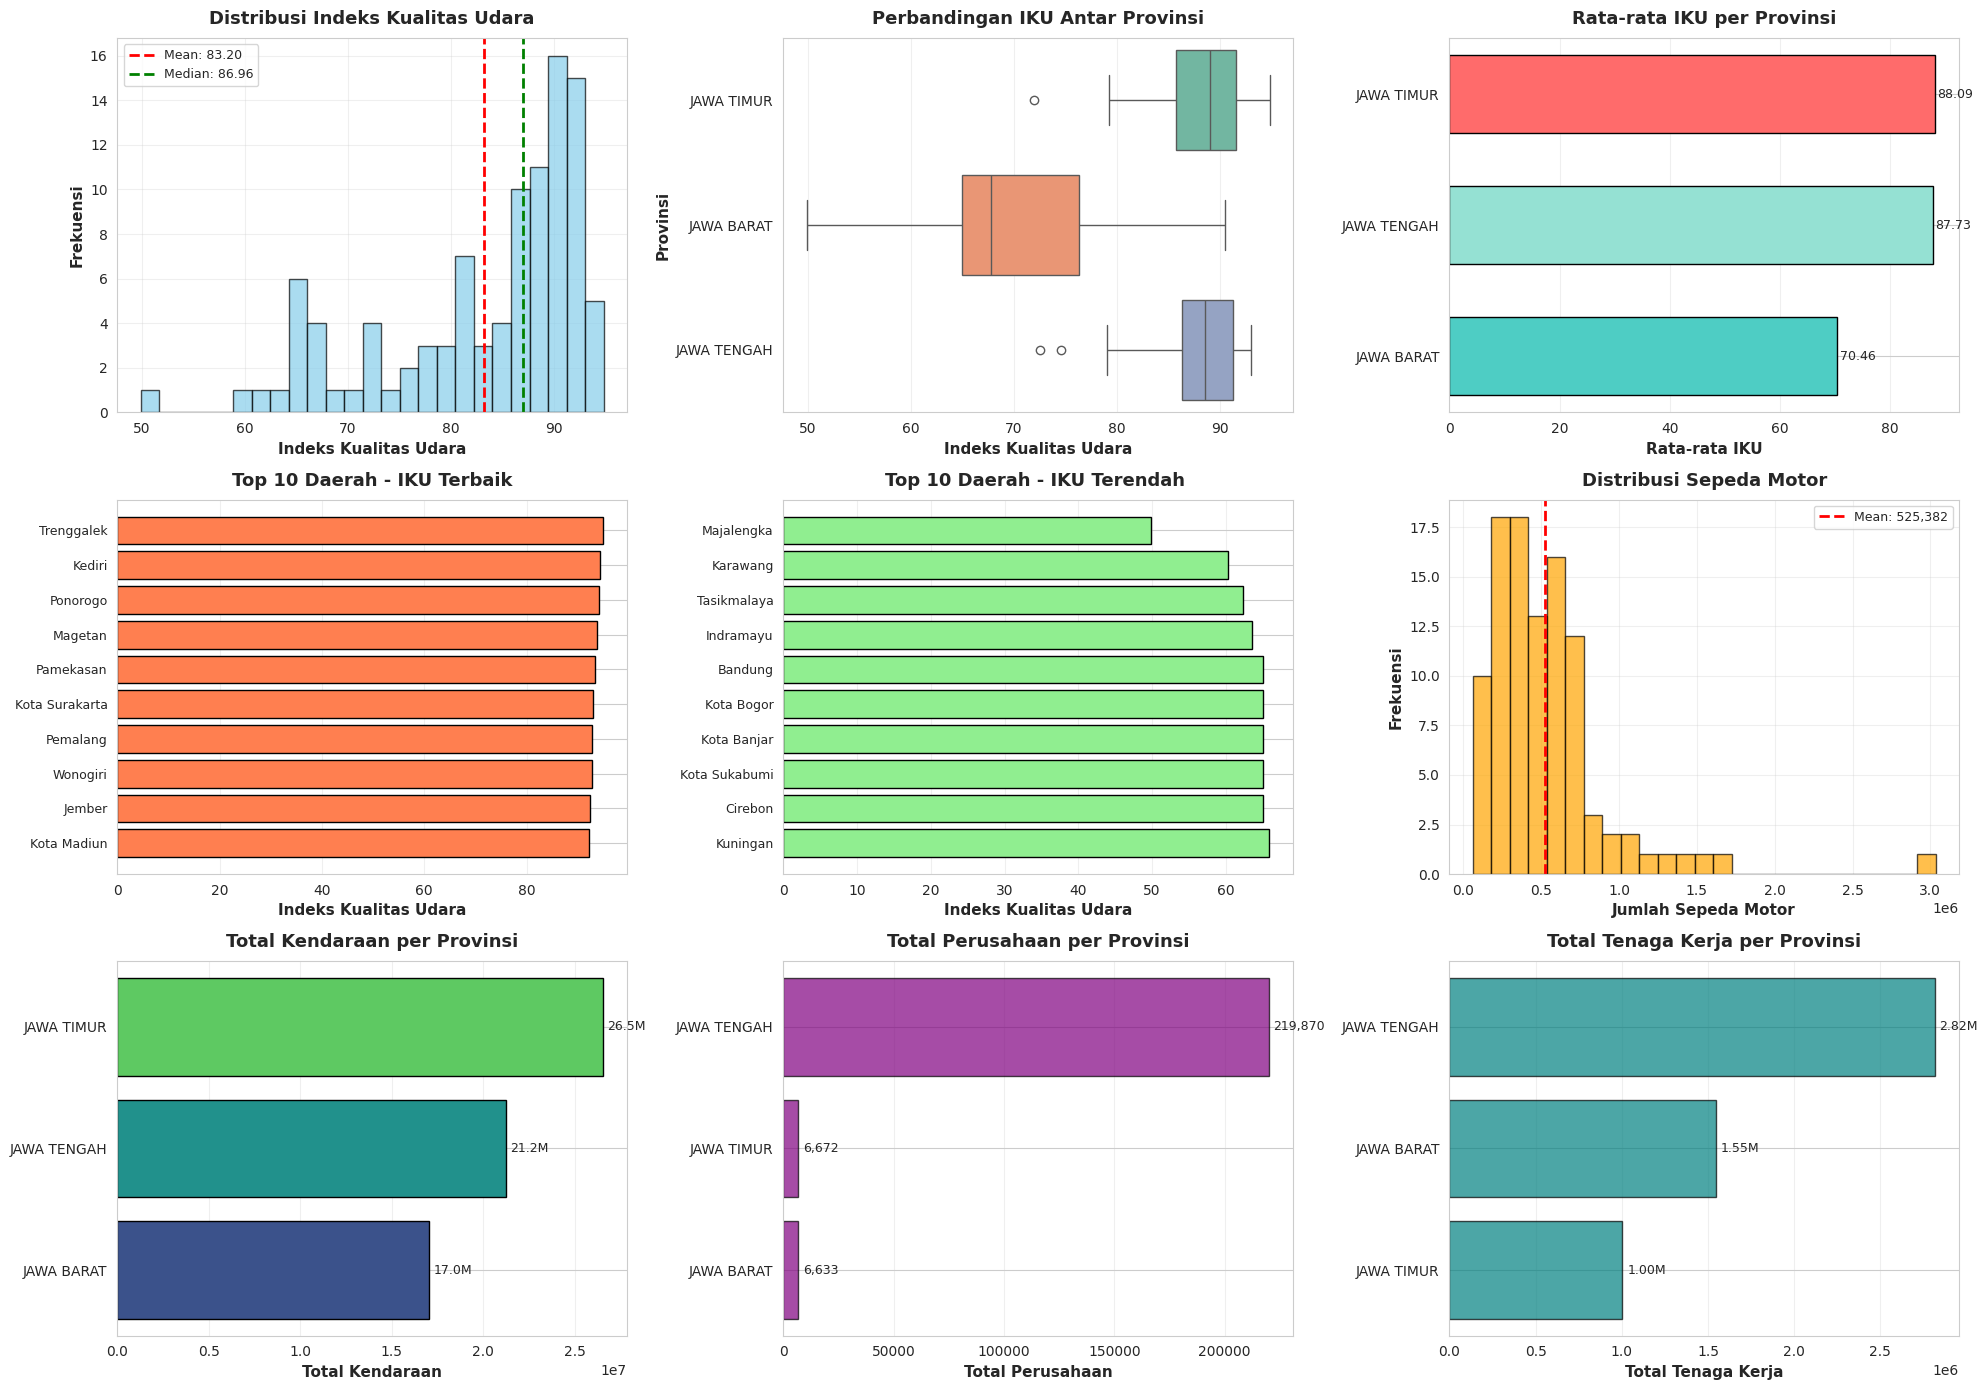

In [ ]:
fig = plt.figure(figsize=(20, 14))

# Plot 1: Histogram IKU
ax1 = plt.subplot(3, 3, 1)
n, bins, patches = plt.hist(final_merged_data['indeks_kualitas_udara'],
                             bins=25, color='skyblue', edgecolor='black', alpha=0.7)
mean_iku = final_merged_data['indeks_kualitas_udara'].mean()
median_iku = final_merged_data['indeks_kualitas_udara'].median()
plt.axvline(mean_iku, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_iku:.2f}')
plt.axvline(median_iku, color='green', linestyle='--', linewidth=2, label=f'Median: {median_iku:.2f}')
plt.xlabel('Indeks Kualitas Udara', fontsize=11, fontweight='bold')
plt.ylabel('Frekuensi', fontsize=11, fontweight='bold')
plt.title('Distribusi Indeks Kualitas Udara', fontsize=13, fontweight='bold', pad=10)
plt.legend(fontsize=9)
plt.grid(alpha=0.3)

# Plot 2: Boxplot IKU per Provinsi
ax2 = plt.subplot(3, 3, 2)
box = sns.boxplot(data=final_merged_data, y='nama_provinsi', x='indeks_kualitas_udara',
                  palette='Set2', orient='h')
plt.ylabel('Provinsi', fontsize=11, fontweight='bold')
plt.xlabel('Indeks Kualitas Udara', fontsize=11, fontweight='bold')
plt.title('Perbandingan IKU Antar Provinsi', fontsize=13, fontweight='bold', pad=10)
plt.grid(alpha=0.3, axis='x')

# Plot 3: Bar Chart Rata-rata IKU
ax3 = plt.subplot(3, 3, 3)
avg_iku_prov = final_merged_data.groupby('nama_provinsi')['indeks_kualitas_udara'].mean().sort_values(ascending=True)
colors = ['#FF6B6B' if x == avg_iku_prov.max() else '#4ECDC4' if x == avg_iku_prov.min() else '#95E1D3' for x in avg_iku_prov]
bars = plt.barh(range(len(avg_iku_prov)), avg_iku_prov.values, color=colors, edgecolor='black', height=0.6)
plt.yticks(range(len(avg_iku_prov)), avg_iku_prov.index, fontsize=10)
plt.xlabel('Rata-rata IKU', fontsize=11, fontweight='bold')
plt.title('Rata-rata IKU per Provinsi', fontsize=13, fontweight='bold', pad=10)
for i, v in enumerate(avg_iku_prov.values):
    plt.text(v + 0.5, i, f'{v:.2f}', va='center', fontsize=9)
plt.grid(alpha=0.3, axis='x')

# Plot 4: Top 10 IKU Tertinggi
ax4 = plt.subplot(3, 3, 4)
top_10 = final_merged_data.nlargest(10, 'indeks_kualitas_udara').sort_values('indeks_kualitas_udara', ascending=True)
bars = plt.barh(range(len(top_10)), top_10['indeks_kualitas_udara'].values, color='coral', edgecolor='black')
plt.yticks(range(len(top_10)), top_10['daerah'].values, fontsize=9)
plt.xlabel('Indeks Kualitas Udara', fontsize=11, fontweight='bold')
plt.title('Top 10 Daerah - IKU Terbaik', fontsize=13, fontweight='bold', pad=10)
plt.grid(alpha=0.3, axis='x')

# Plot 5: Top 10 IKU Terendah
ax5 = plt.subplot(3, 3, 5)
bottom_10 = final_merged_data.nsmallest(10, 'indeks_kualitas_udara').sort_values('indeks_kualitas_udara', ascending=False)
bars = plt.barh(range(len(bottom_10)), bottom_10['indeks_kualitas_udara'].values,
                color='lightgreen', edgecolor='black')
plt.yticks(range(len(bottom_10)), bottom_10['daerah'].values, fontsize=9)
plt.xlabel('Indeks Kualitas Udara', fontsize=11, fontweight='bold')
plt.title('Top 10 Daerah - IKU Terendah ', fontsize=13, fontweight='bold', pad=10)
plt.grid(alpha=0.3, axis='x')

# Plot 6: Distribusi Sepeda Motor
ax6 = plt.subplot(3, 3, 6)
plt.hist(final_merged_data['Sepeda Motor'], bins=25, color='orange', edgecolor='black', alpha=0.7)
plt.axvline(final_merged_data['Sepeda Motor'].mean(), color='red', linestyle='--',
            linewidth=2, label=f"Mean: {final_merged_data['Sepeda Motor'].mean():,.0f}")
plt.xlabel('Jumlah Sepeda Motor', fontsize=11, fontweight='bold')
plt.ylabel('Frekuensi', fontsize=11, fontweight='bold')
plt.title('Distribusi Sepeda Motor', fontsize=13, fontweight='bold', pad=10)
plt.legend(fontsize=9)
plt.grid(alpha=0.3)

# Plot 7: Total Kendaraan per Provinsi
ax7 = plt.subplot(3, 3, 7)
total_kendaraan = final_merged_data.groupby('nama_provinsi')['Jumlah'].sum().sort_values(ascending=True)
bars = plt.barh(range(len(total_kendaraan)), total_kendaraan.values,
                color=sns.color_palette('viridis', len(total_kendaraan)), edgecolor='black')
plt.yticks(range(len(total_kendaraan)), total_kendaraan.index, fontsize=10)
plt.xlabel('Total Kendaraan', fontsize=11, fontweight='bold')
plt.title('Total Kendaraan per Provinsi', fontsize=13, fontweight='bold', pad=10)
for i, v in enumerate(total_kendaraan.values):
    plt.text(v + max(total_kendaraan.values)*0.01, i, f'{v/1e6:.1f}M', va='center', fontsize=9)
plt.grid(alpha=0.3, axis='x')

# Plot 8: Total Perusahaan per Provinsi
ax8 = plt.subplot(3, 3, 8)
total_perusahaan = final_merged_data.groupby('nama_provinsi')['Perusahaan'].sum().sort_values(ascending=True)
bars = plt.barh(range(len(total_perusahaan)), total_perusahaan.values,
                color='purple', alpha=0.7, edgecolor='black')
plt.yticks(range(len(total_perusahaan)), total_perusahaan.index, fontsize=10)
plt.xlabel('Total Perusahaan', fontsize=11, fontweight='bold')
plt.title('Total Perusahaan per Provinsi', fontsize=13, fontweight='bold', pad=10)
for i, v in enumerate(total_perusahaan.values):
    plt.text(v + max(total_perusahaan.values)*0.01, i, f'{v:,.0f}', va='center', fontsize=9)
plt.grid(alpha=0.3, axis='x')

# Plot 9: Total Tenaga Kerja per Provinsi
ax9 = plt.subplot(3, 3, 9)
total_tk = final_merged_data.groupby('nama_provinsi')['Jumlah Tenaga Kerja'].sum().sort_values(ascending=True)
bars = plt.barh(range(len(total_tk)), total_tk.values,
                color='teal', alpha=0.7, edgecolor='black')
plt.yticks(range(len(total_tk)), total_tk.index, fontsize=10)
plt.xlabel('Total Tenaga Kerja', fontsize=11, fontweight='bold')
plt.title('Total Tenaga Kerja per Provinsi', fontsize=13, fontweight='bold', pad=10)
for i, v in enumerate(total_tk.values):
    plt.text(v + max(total_tk.values)*0.01, i, f'{v/1e6:.2f}M', va='center', fontsize=9)
plt.grid(alpha=0.3, axis='x')

plt.tight_layout()
plt.savefig('1_eda_overview.png', dpi=300, bbox_inches='tight')
plt.show()

ANALISIS KORELASI

Korelasi dengan Indeks Kualitas Udara:
indeks_kualitas_udara    1.000000
Perusahaan               0.162175
Mobil                    0.152639
Truk                     0.125011
Bus                      0.081869
Jumlah                   0.075250
Sepeda Motor             0.046945
Jumlah Tenaga Kerja     -0.043326




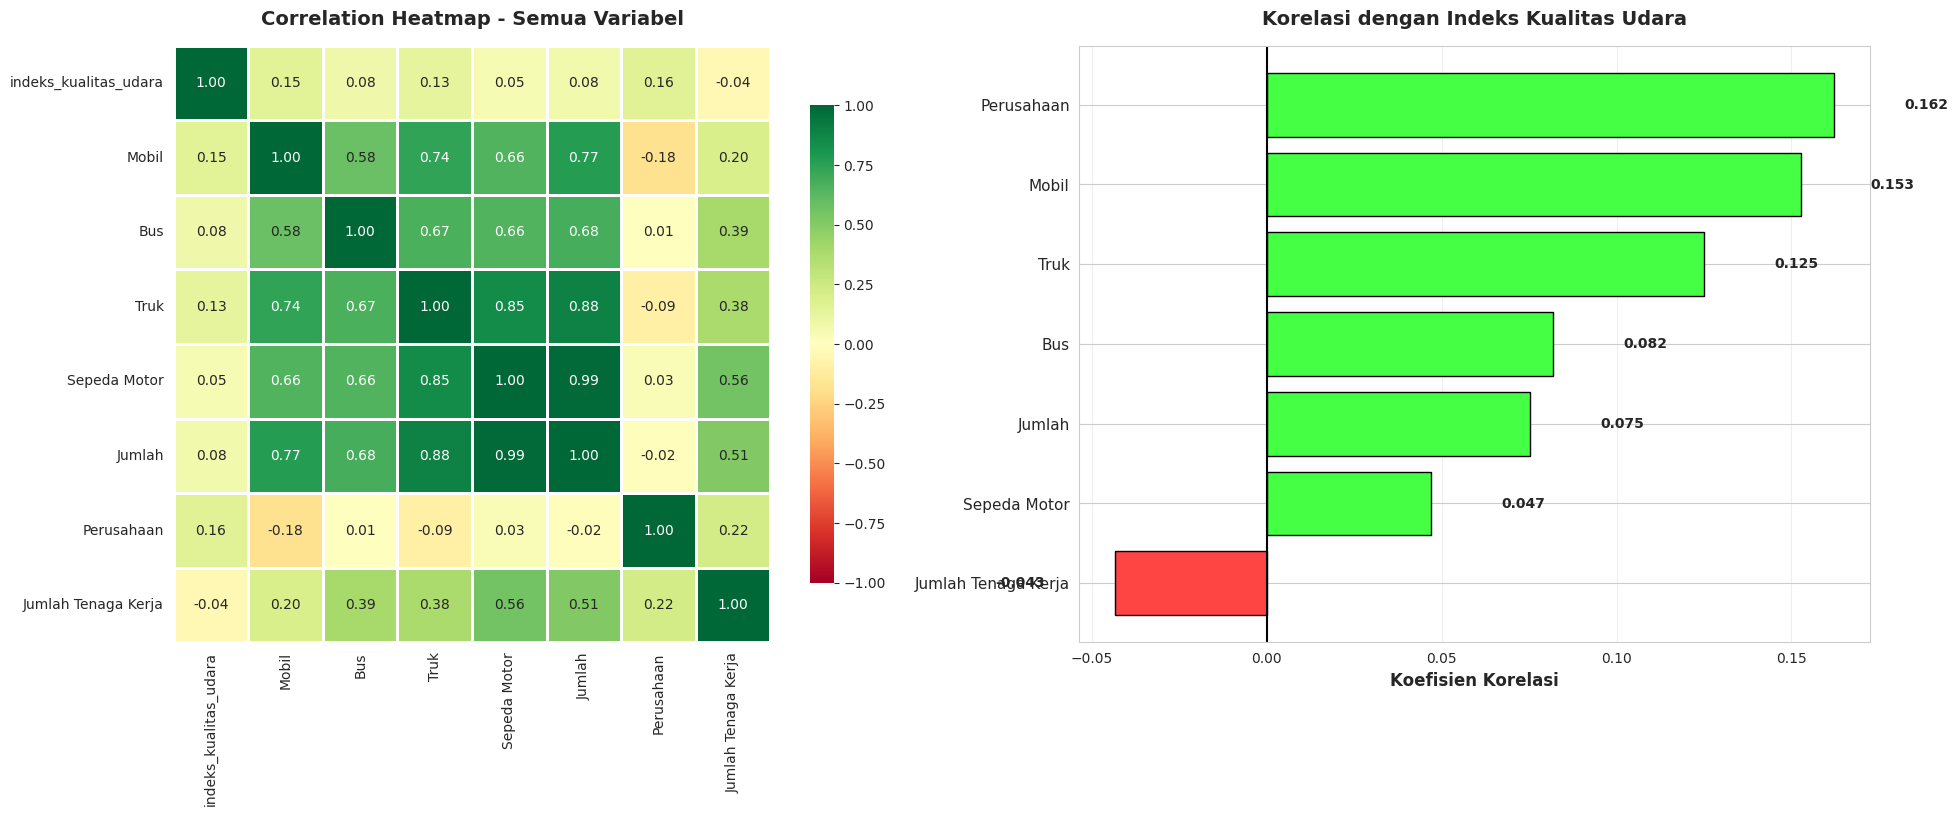

In [ ]:
print("="*100)
print("ANALISIS KORELASI")
print("="*100)

correlation_matrix = final_merged_data[numeric_columns].corr()
print("\nKorelasi dengan Indeks Kualitas Udara:")
print(correlation_matrix['indeks_kualitas_udara'].sort_values(ascending=False).to_string())
print("\n")

# Visualisasi Korelasi
fig = plt.figure(figsize=(20, 8))

# Heatmap
ax1 = plt.subplot(1, 2, 1)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='RdYlGn', center=0,
            square=True, linewidths=1, cbar_kws={'shrink': 0.8}, vmin=-1, vmax=1)
plt.title('Correlation Heatmap - Semua Variabel', fontsize=14, fontweight='bold', pad=15)

# Bar Chart Korelasi dengan IKU
ax2 = plt.subplot(1, 2, 2)
iku_corr = correlation_matrix['indeks_kualitas_udara'].drop('indeks_kualitas_udara').sort_values()
colors = ['#FF4444' if x < 0 else '#44FF44' for x in iku_corr]
bars = plt.barh(range(len(iku_corr)), iku_corr.values, color=colors, edgecolor='black')
plt.yticks(range(len(iku_corr)), iku_corr.index, fontsize=11)
plt.xlabel('Koefisien Korelasi', fontsize=12, fontweight='bold')
plt.title('Korelasi dengan Indeks Kualitas Udara', fontsize=14, fontweight='bold', pad=15)
plt.axvline(0, color='black', linewidth=1.5, linestyle='-')
for i, v in enumerate(iku_corr.values):
    plt.text(v + 0.02 if v > 0 else v - 0.02, i, f'{v:.3f}',
             va='center', ha='left' if v > 0 else 'right', fontsize=10, fontweight='bold')
plt.grid(alpha=0.3, axis='x')

plt.tight_layout()
plt.savefig('2_correlation_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

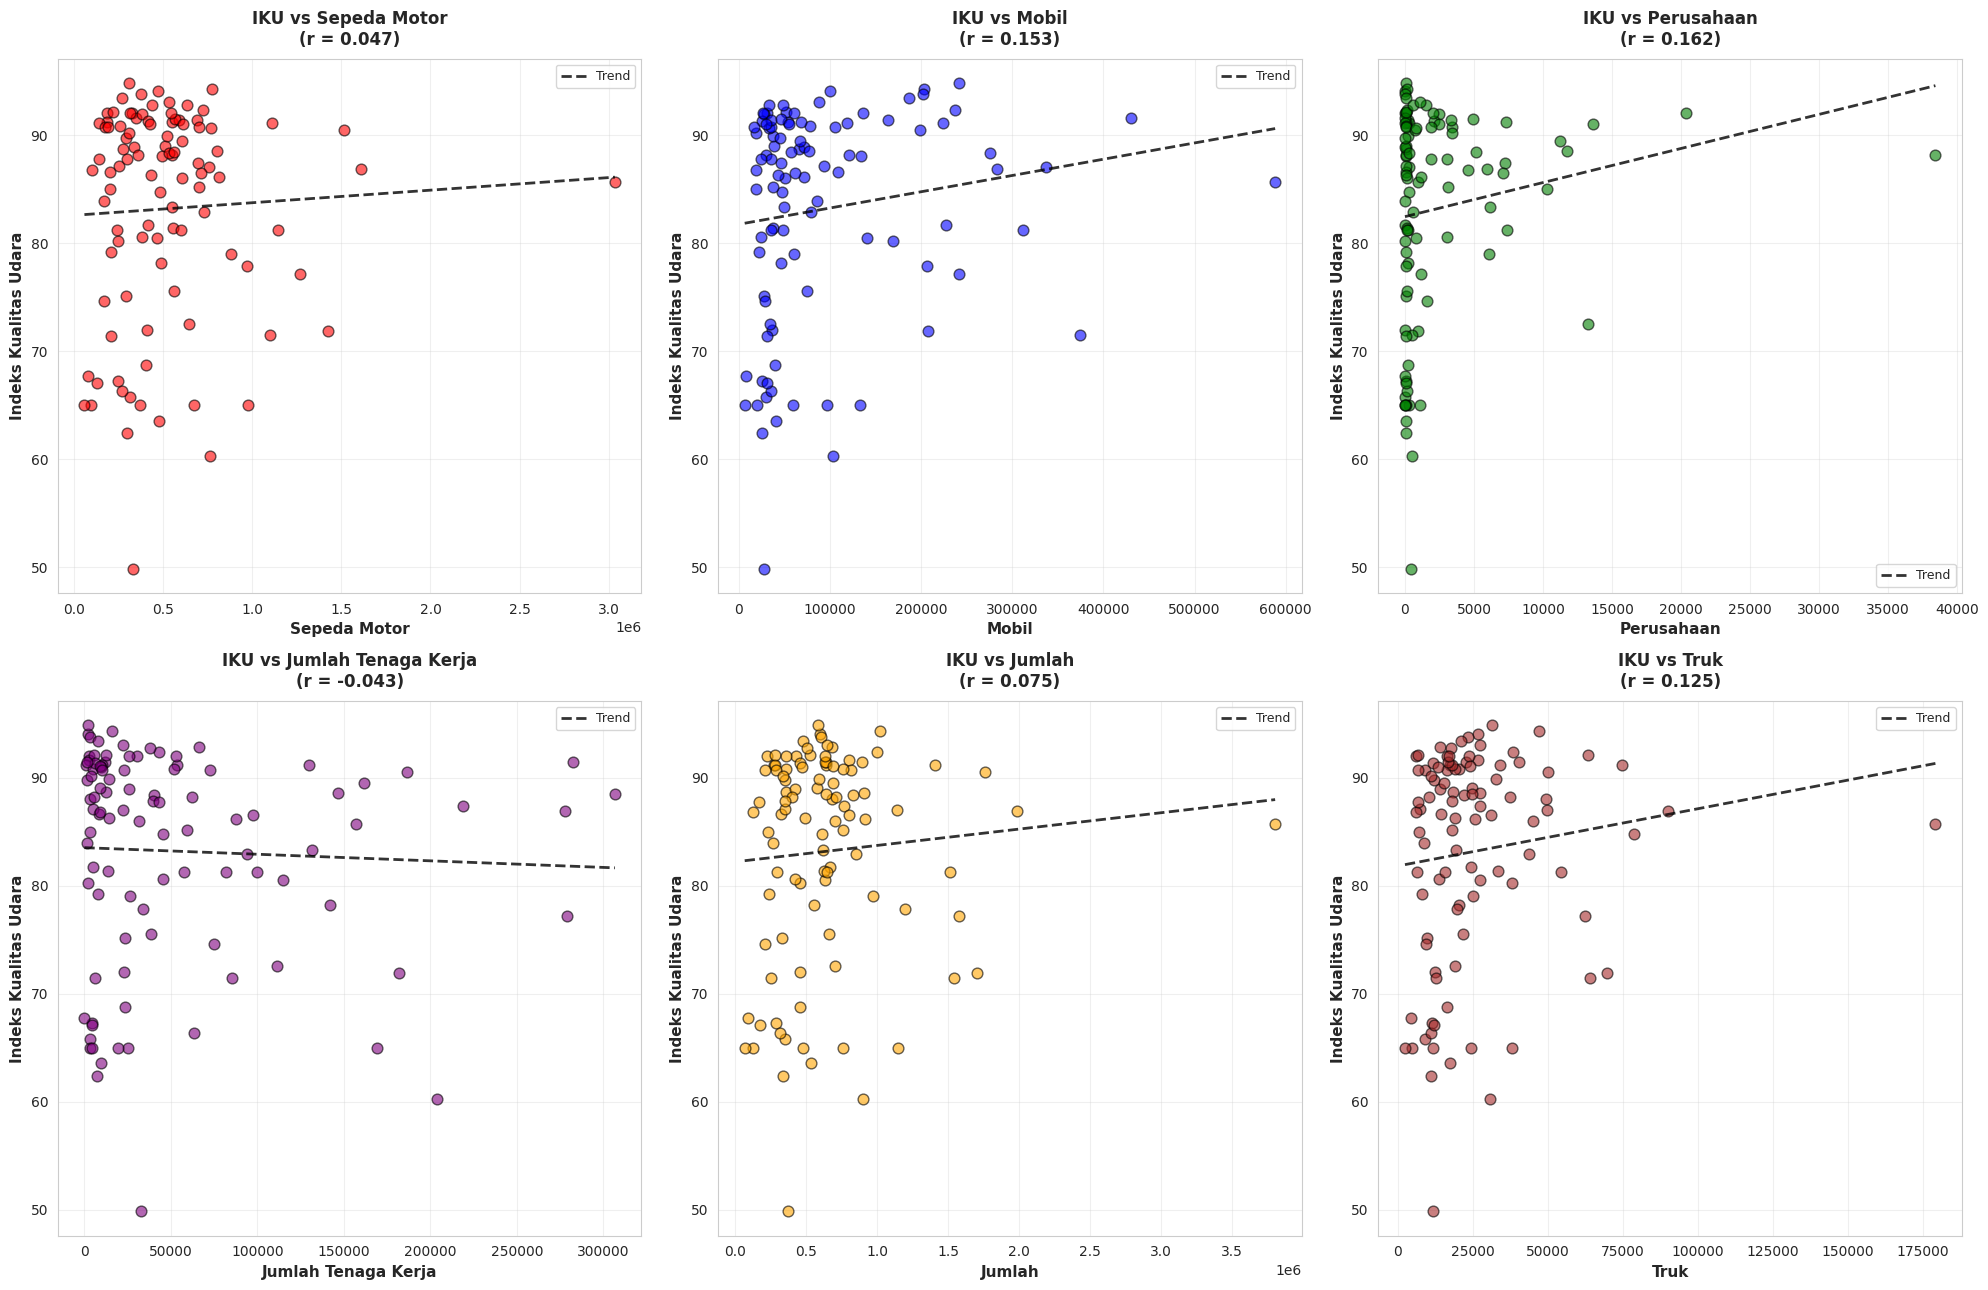

In [ ]:
fig = plt.figure(figsize=(20, 13))

scatter_vars = [
    ('Sepeda Motor', 'red'),
    ('Mobil', 'blue'),
    ('Perusahaan', 'green'),
    ('Jumlah Tenaga Kerja', 'purple'),
    ('Jumlah', 'orange'),
    ('Truk', 'brown')
]

for idx, (var, color) in enumerate(scatter_vars, 1):
    ax = plt.subplot(2, 3, idx)
    plt.scatter(final_merged_data[var], final_merged_data['indeks_kualitas_udara'],
                alpha=0.6, c=color, edgecolors='black', s=60)

    # Add trendline
    z = np.polyfit(final_merged_data[var].dropna(),
                   final_merged_data.loc[final_merged_data[var].notna(), 'indeks_kualitas_udara'], 1)
    p = np.poly1d(z)
    plt.plot(final_merged_data[var].sort_values(),
             p(final_merged_data[var].sort_values()),
             "k--", alpha=0.8, linewidth=2, label='Trend')

    # Correlation
    corr = final_merged_data[[var, 'indeks_kualitas_udara']].corr().iloc[0, 1]

    plt.xlabel(var, fontsize=11, fontweight='bold')
    plt.ylabel('Indeks Kualitas Udara', fontsize=11, fontweight='bold')
    plt.title(f'IKU vs {var}\n(r = {corr:.3f})', fontsize=12, fontweight='bold', pad=10)
    plt.legend(fontsize=9)
    plt.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('3_scatter_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

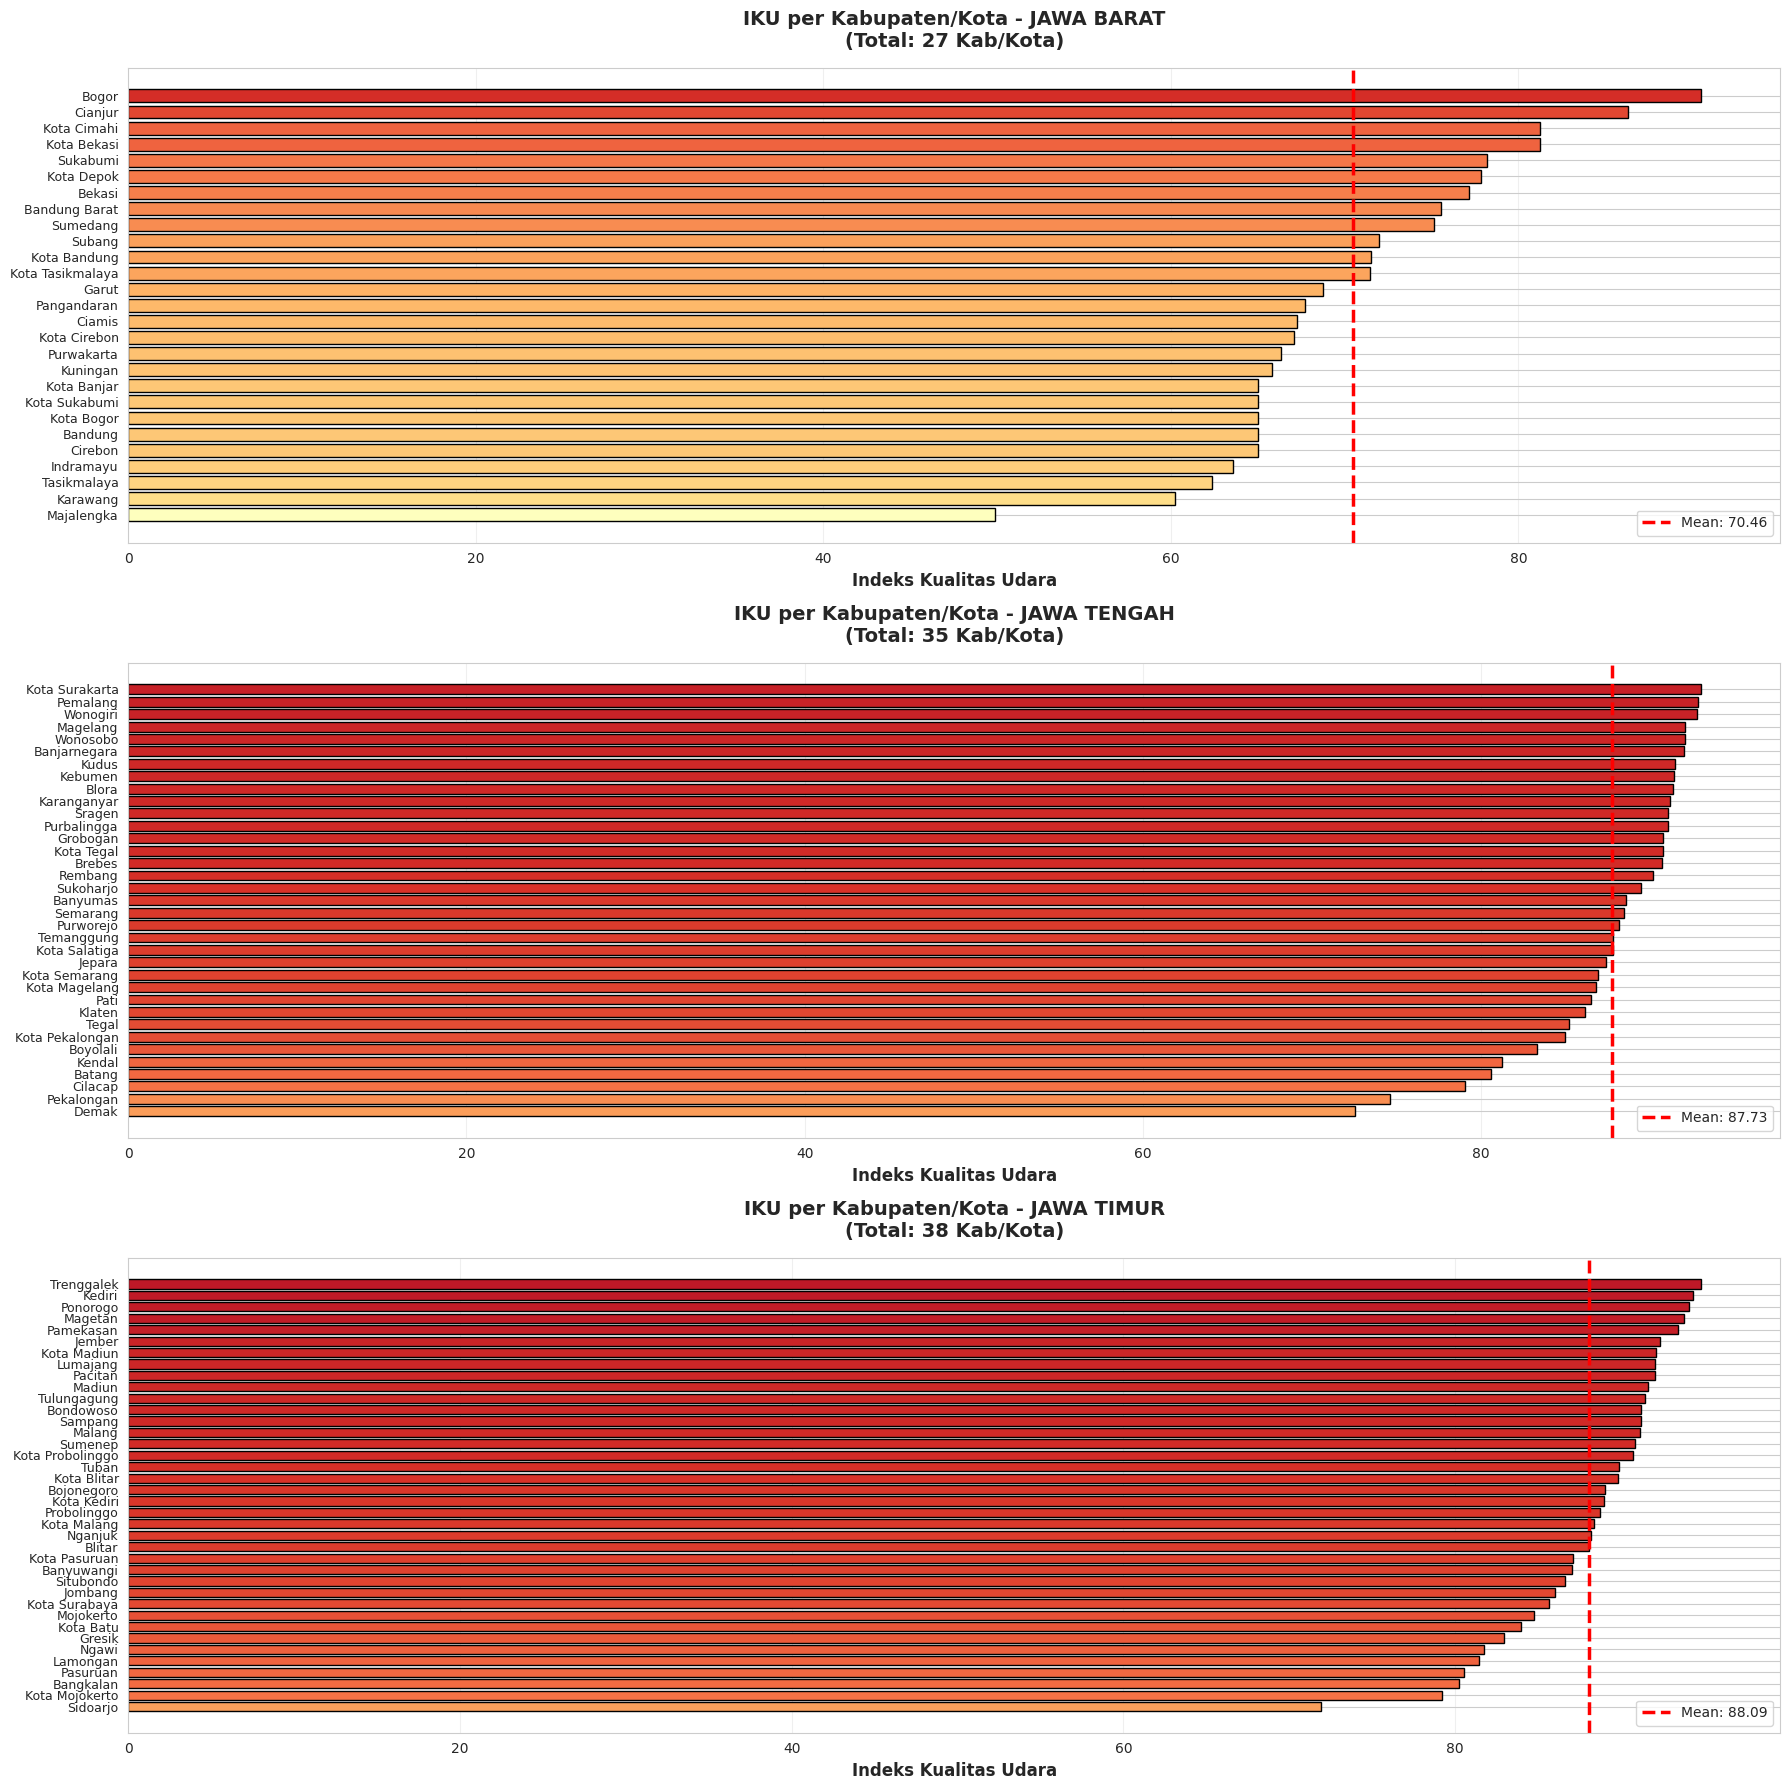

In [ ]:
provinsi_list = sorted(final_merged_data['nama_provinsi'].unique())
n_provinsi = len(provinsi_list)

fig = plt.figure(figsize=(18, 6*n_provinsi))

for idx, provinsi in enumerate(provinsi_list, 1):
    data_prov = final_merged_data[final_merged_data['nama_provinsi'] == provinsi].copy()
    data_prov_sorted = data_prov.sort_values('indeks_kualitas_udara', ascending=True)

    ax = plt.subplot(n_provinsi, 1, idx)

    colors = plt.cm.RdYlGn_r(data_prov_sorted['indeks_kualitas_udara'] / 100)
    bars = plt.barh(range(len(data_prov_sorted)),
                    data_prov_sorted['indeks_kualitas_udara'].values,
                    color=colors, edgecolor='black', height=0.8)

    plt.yticks(range(len(data_prov_sorted)), data_prov_sorted['daerah'].values, fontsize=9)
    plt.xlabel('Indeks Kualitas Udara', fontsize=12, fontweight='bold')
    mean_val = data_prov['indeks_kualitas_udara'].mean()
    plt.axvline(mean_val, color='red', linestyle='--', linewidth=2.5,
                label=f'Mean: {mean_val:.2f}')
    plt.title(f'IKU per Kabupaten/Kota - {provinsi}\n(Total: {len(data_prov)} Kab/Kota)',
              fontsize=14, fontweight='bold', pad=15)
    plt.legend(fontsize=10, loc='lower right')
    plt.grid(alpha=0.3, axis='x')

plt.tight_layout()
plt.savefig('4_provinsi_detail.png', dpi=300, bbox_inches='tight')
plt.show()

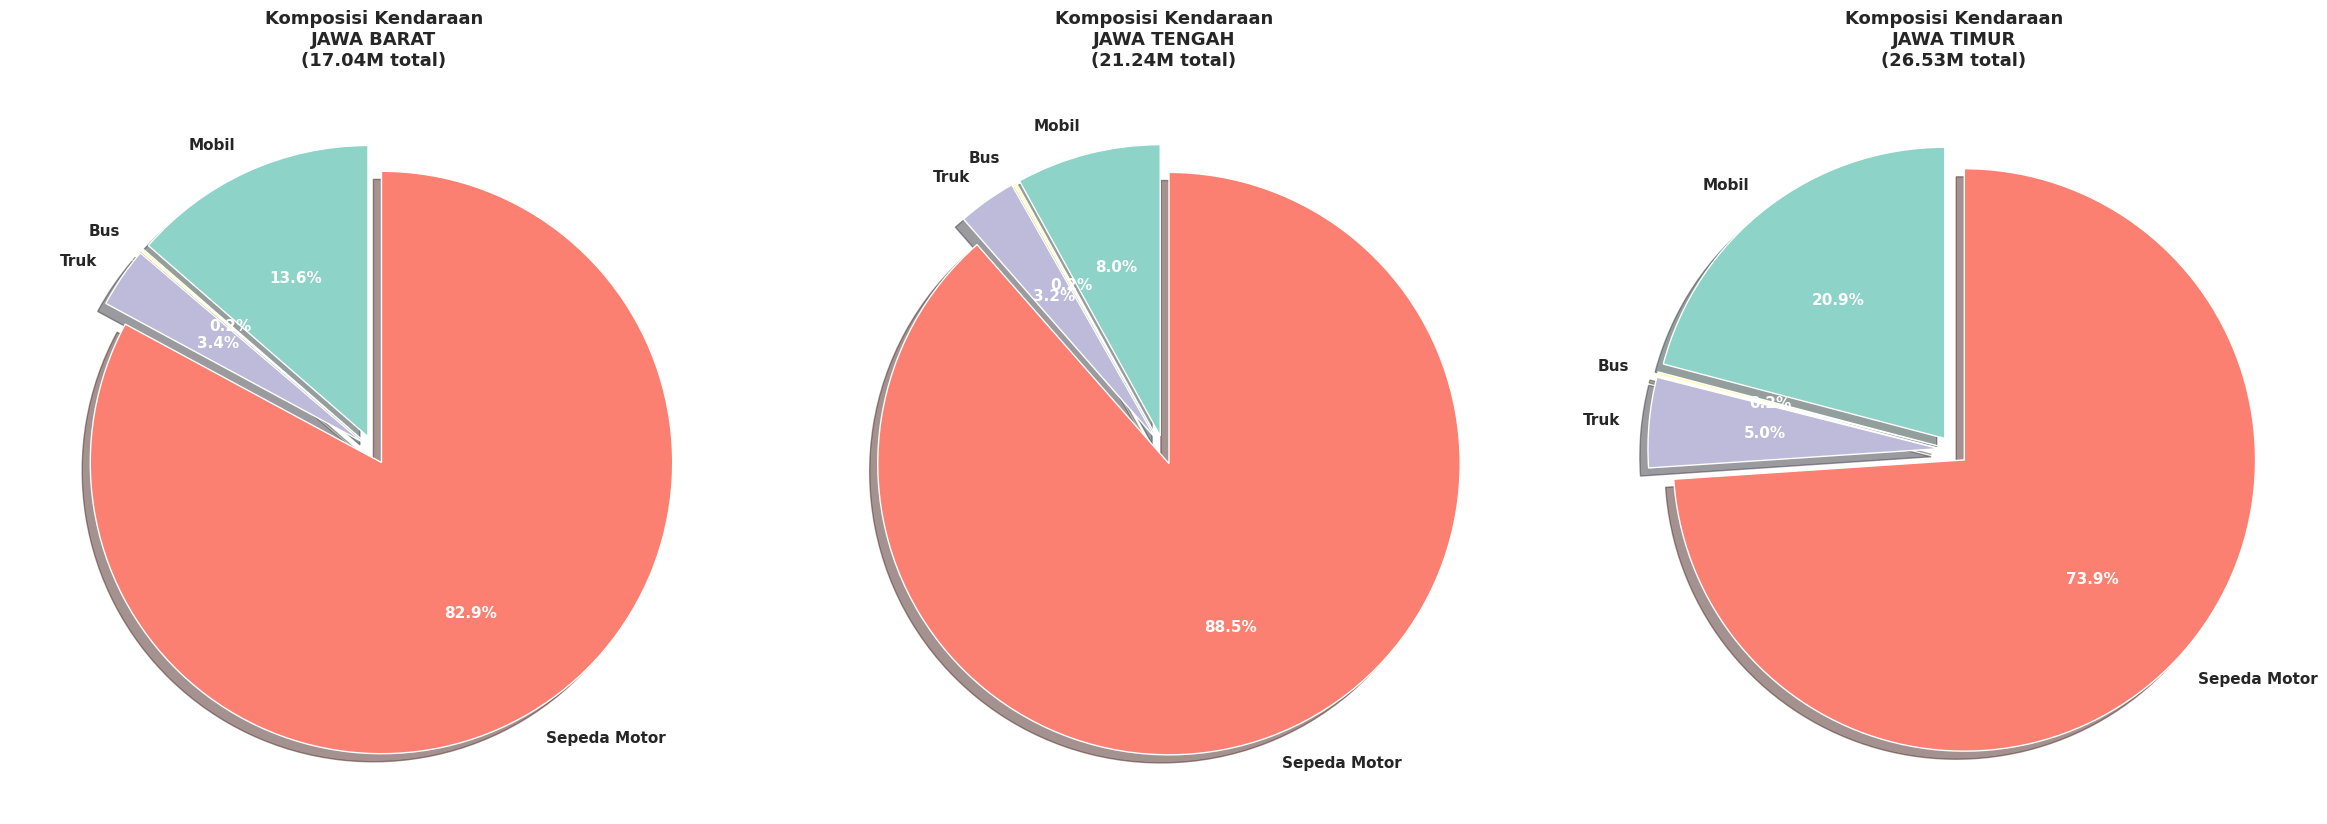

In [ ]:
kendaraan_cols = ['Mobil', 'Bus', 'Truk', 'Sepeda Motor']
n_provinsi = len(provinsi_list)

fig = plt.figure(figsize=(8*n_provinsi, 8))

for idx, provinsi in enumerate(provinsi_list, 1):
    data_prov = final_merged_data[final_merged_data['nama_provinsi'] == provinsi]
    kendaraan_sum = data_prov[kendaraan_cols].sum()

    ax = plt.subplot(1, n_provinsi, idx)
    colors = sns.color_palette('Set3', len(kendaraan_cols))
    wedges, texts, autotexts = plt.pie(kendaraan_sum.values, labels=kendaraan_cols,
                                        autopct='%1.1f%%', startangle=90, colors=colors,
                                        explode=[0.05]*len(kendaraan_cols), shadow=True)

    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontsize(11)
        autotext.set_fontweight('bold')

    for text in texts:
        text.set_fontsize(11)
        text.set_fontweight('bold')

    plt.title(f'Komposisi Kendaraan\n{provinsi}\n({kendaraan_sum.sum()/1e6:.2f}M total)',
              fontsize=13, fontweight='bold', pad=15)

plt.tight_layout()
plt.savefig('5_kendaraan_komposisi.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
print("\n" + "="*100)
print("SUMMARY INSIGHTS & KEY FINDINGS")
print("="*100)

# IKU Statistics
prov_iku = final_merged_data.groupby('nama_provinsi')['indeks_kualitas_udara'].agg(['mean', 'min', 'max', 'std'])
print("\nINDEKS KUALITAS UDARA:")
print(f"   Provinsi IKU Tertinggi    : {prov_iku['mean'].idxmax()} ({prov_iku['mean'].max():.2f})")
print(f"   Provinsi IKU Terendah     : {prov_iku['mean'].idxmin()} ({prov_iku['mean'].min():.2f})")
print(f"   Rata-rata IKU Keseluruhan : {final_merged_data['indeks_kualitas_udara'].mean():.2f}")
print(f"   IKU Maksimum              : {final_merged_data['indeks_kualitas_udara'].max():.2f} ({final_merged_data.loc[final_merged_data['indeks_kualitas_udara'].idxmax(), 'daerah']})")
print(f"   IKU Minimum               : {final_merged_data['indeks_kualitas_udara'].min():.2f} ({final_merged_data.loc[final_merged_data['indeks_kualitas_udara'].idxmin(), 'daerah']})")

# Vehicle Statistics
prov_motor = final_merged_data.groupby('nama_provinsi')['Sepeda Motor'].sum()
print(f"\nKENDARAAN:")
print(f"   Provinsi Sepeda Motor Terbanyak: {prov_motor.idxmax()} ({prov_motor.max():,.0f} unit)")
print(f"   Total Sepeda Motor Pulau Jawa  : {final_merged_data['Sepeda Motor'].sum():,.0f} unit")
print(f"   Total Kendaraan Pulau Jawa     : {final_merged_data['Jumlah'].sum():,.0f} unit")

# Industry Statistics
prov_perusahaan = final_merged_data.groupby('nama_provinsi')['Perusahaan'].sum()
prov_tk = final_merged_data.groupby('nama_provinsi')['Jumlah Tenaga Kerja'].sum()
print(f"\nINDUSTRI:")
print(f"   Provinsi Perusahaan Terbanyak: {prov_perusahaan.idxmax()} ({prov_perusahaan.max():,.0f} perusahaan)")
print(f"   Provinsi Tenaga Kerja Terbanyak: {prov_tk.idxmax()} ({prov_tk.max():,.0f} orang)")
print(f"   Total Perusahaan Pulau Jawa   : {final_merged_data['Perusahaan'].sum():,.0f}")
print(f"   Total Tenaga Kerja Pulau Jawa : {final_merged_data['Jumlah Tenaga Kerja'].sum():,.0f}")

# Correlation Insights
strongest_corr_var = correlation_matrix['indeks_kualitas_udara'].drop('indeks_kualitas_udara').abs().idxmax()
strongest_corr_val = correlation_matrix.loc[strongest_corr_var, 'indeks_kualitas_udara']
print(f"\nKORELASI:")
print(f"   Variabel dengan korelasi terkuat: {strongest_corr_var}")
print(f"   Koefisien korelasi              : {strongest_corr_val:.3f}")

print("\n" + "="*100)
print("ANALISIS EDA SELESAI!")
print("="*100)
print("\nFile yang dihasilkan:")
print("   1. 1_eda_overview.png        - Overview distribusi dan perbandingan")
print("   2. 2_correlation_analysis.png - Analisis korelasi lengkap")
print("   3. 3_scatter_analysis.png    - Scatter plot hubungan antar variabel")
print("   4. 4_provinsi_detail.png     - Detail IKU per daerah tiap provinsi")
print("   5. 5_kendaraan_komposisi.png - Pie chart komposisi kendaraan")
print("\n Semua visualisasi berhasil dibuat!")
print("="*100)


SUMMARY INSIGHTS & KEY FINDINGS

INDEKS KUALITAS UDARA:
   Provinsi IKU Tertinggi    : JAWA TIMUR (88.09)
   Provinsi IKU Terendah     : JAWA BARAT (70.46)
   Rata-rata IKU Keseluruhan : 83.20
   IKU Maksimum              : 94.84 (Trenggalek)
   IKU Minimum               : 49.85 (Majalengka)

KENDARAAN:
   Provinsi Sepeda Motor Terbanyak: JAWA TIMUR (19,615,284 unit)
   Total Sepeda Motor Pulau Jawa  : 52,538,225 unit
   Total Kendaraan Pulau Jawa     : 64,798,954 unit

INDUSTRI:
   Provinsi Perusahaan Terbanyak: JAWA TENGAH (219,870 perusahaan)
   Provinsi Tenaga Kerja Terbanyak: JAWA TENGAH (2,815,025 orang)
   Total Perusahaan Pulau Jawa   : 233,175
   Total Tenaga Kerja Pulau Jawa : 5,364,159

KORELASI:
   Variabel dengan korelasi terkuat: Perusahaan
   Koefisien korelasi              : 0.162

ANALISIS EDA SELESAI!

File yang dihasilkan:
   1. 1_eda_overview.png        - Overview distribusi dan perbandingan
   2. 2_correlation_analysis.png - Analisis korelasi lengkap
   3. 3_scatt